Read data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# read
train_data = pd.read_excel('../Data_Q5/Q5_train.xlsx')
test_data = pd.read_csv('../Data_Q5/Q5_test.csv')

In [2]:
train_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165.0,60,81.0,0.5,0.6,1,1.0,135,...,40,75,16.5,1.0,1.0,22,25,27,0,1
1,1,70,165.0,65,89.0,0.6,0.7,2,2.0,146,...,57,126,16.2,1.0,1.1,27,23,37,1,0
2,2,20,170.0,75,81.0,0.4,0.5,1,1.0,118,...,45,93,17.4,1.0,0.8,27,31,53,0,1
3,3,35,180.0,95,105.0,1.5,1.2,1,1.0,131,...,38,102,15.9,1.0,1.0,20,27,30,1,0
4,4,30,165.0,60,80.5,1.5,1.0,1,1.0,121,...,44,93,15.4,1.0,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155.0,45,69.0,1.5,2.0,1,1.0,127,...,72,159,14.5,1.0,0.8,25,26,13,0,0
159252,159252,50,155.0,75,82.0,1.0,1.0,1,1.0,120,...,64,108,14.5,1.0,0.6,21,20,18,0,0
159253,159253,40,160.0,50,66.0,1.5,1.0,1,1.0,114,...,87,93,10.9,1.0,0.6,15,9,12,0,0
159254,159254,50,165.0,75,92.0,1.2,1.0,1,1.0,121,...,55,80,14.4,1.0,1.1,22,17,37,0,1


In [3]:
test_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [4]:
train_data.isnull().any()

id                     False
age                    False
height(cm)              True
weight(kg)             False
waist(cm)               True
eyesight(left)          True
eyesight(right)         True
hearing(left)          False
hearing(right)          True
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein           True
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
dtype: bool

In [5]:
for column_name in train_data.columns:
    train_data[column_name].fillna(train_data[column_name].mean(), inplace=True)


Eye sight(I didn't think it would work but I added it and it worked)

In [6]:
def process_eyesight(data):
    data['is_near_sighted'] = data.apply(lambda row: row['eyesight(left)'] < 1.0 and row['eyesight(right)'] < 1.0, axis=1)
    # data  = data.drop(['eyesight(left)', 'eyesight(right)'], axis=1)
    return data
train_data = process_eyesight(train_data)
test_data = process_eyesight(test_data)

train_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,is_near_sighted
0,0,55,165.0,60,81.0,0.5,0.6,1,1.0,135,...,75,16.5,1.0,1.0,22,25,27,0,1,True
1,1,70,165.0,65,89.0,0.6,0.7,2,2.0,146,...,126,16.2,1.0,1.1,27,23,37,1,0,True
2,2,20,170.0,75,81.0,0.4,0.5,1,1.0,118,...,93,17.4,1.0,0.8,27,31,53,0,1,True
3,3,35,180.0,95,105.0,1.5,1.2,1,1.0,131,...,102,15.9,1.0,1.0,20,27,30,1,0,False
4,4,30,165.0,60,80.5,1.5,1.0,1,1.0,121,...,93,15.4,1.0,0.8,19,13,17,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155.0,45,69.0,1.5,2.0,1,1.0,127,...,159,14.5,1.0,0.8,25,26,13,0,0,False
159252,159252,50,155.0,75,82.0,1.0,1.0,1,1.0,120,...,108,14.5,1.0,0.6,21,20,18,0,0,False
159253,159253,40,160.0,50,66.0,1.5,1.0,1,1.0,114,...,93,10.9,1.0,0.6,15,9,12,0,0,False
159254,159254,50,165.0,75,92.0,1.2,1.0,1,1.0,121,...,80,14.4,1.0,1.1,22,17,37,0,1,False


hemoglobin_category
hemoglobin 11-16.5              https://baike.baidu.com/item/%E8%A1%80%E7%BA%A2%E8%9B%8B%E7%99%BD/94131
AST: 8-40U/L,    ALT:5~40U/L             https://m.baidu.com/bh/m/detail/ar_15378021057434906537
GTp 0～40U/L                  https://www.baidu.com/link?url=GY8oslMtYFcL2htwCW4KcYDhtPwV5RWaeTmdSDyJP6gfvUSg82zEzBkrhbra8F51VO-cNln8RH2H3GYmbhgq7a&wd=&eqid=bca1734a001ad38e00000006657c019f
I experimented with hemoglobin labels and found that both are important,so I add more feature
After checking the 

In [7]:
def categorize_blood_tests(data):
    # hemoglobin_category
    data['hemoglobin_category'] = data['hemoglobin'].apply(lambda x: 0 if 11 <= x <= 16.5 else 1)
    # SAT
    data['AST_category'] = data['AST'].apply(lambda x: 0 if 8 <= x <= 40 else 1)
    # ALT
    data['ALT_category'] = data['ALT'].apply(lambda x: 0 if 5 <= x <= 40 else 1)
    data['Gtp/LDL'] = data['Gtp'] / data['LDL']
    data['Gtp/AST'] = data['Gtp'] / data['AST']
    data['Gtp/Cholesterol'] = data['Gtp'] / data['Cholesterol']
    data['HDL/Gtp'] = data['HDL'] / data['Gtp']
    data['Gtp/systolic'] = data['Gtp'] / data['systolic']
    num_bins = 4 

    data['hemoglobin_bin'] = pd.qcut(data['hemoglobin'], q=num_bins, labels=False)
    data['AST_bin'] = pd.qcut(data['AST'], q=num_bins, labels=False)
    data['ALT_bin'] = pd.qcut(data['ALT'], q=num_bins, labels=False)
    data['LDL_bin'] = pd.qcut(data['LDL'], q=num_bins, labels=False)
    data['Cholesterol_bin'] = pd.qcut(data['Cholesterol'], q=num_bins, labels=False)
    data['HDL_bin'] = pd.qcut(data['HDL'], q=num_bins, labels=False)
    data['systolic_bin'] = pd.qcut(data['systolic'], q=num_bins, labels=False)
    # Create a product feature with hemoglobin for each feature, excluding the column named 'smoking'
    excluded_columns = ['hemoglobin','smoking']
    for column in data.columns:
        if column not in excluded_columns:
            data[f'hemoglobin_x_{column}'] = data['hemoglobin'] * data[column]
    data['Gtp'] = np.clip(data['Gtp'], 0, 300)
    data['ALT'] = np.clip(data['ALT'], 0, 150)
    data['AST'] = np.clip(data['AST'], 0, 100)
    data["Liver Enzyme Ratio"] = data["AST"] / data["ALT"]

#     data.drop(['hemoglobin', 'AST', 'ALT'], axis=1, inplace=True)
    return data



train_data = categorize_blood_tests(train_data)
test_data = categorize_blood_tests(test_data)


Hearing and age

In [8]:
# process listening data and age classification
def process_hearing_and_age(data):
    data = data.drop(['hearing(left)', 'hearing(right)'], axis=1)
    
    # classify age in the range of 10 years: 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-85
    bins = [20, 30, 40, 50, 60, 70, 80, 86]
    labels = ['1', '2', '3', '4', '5', '6', '7']
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
    # data = data.drop(['age'], axis=1)

    return data

train_data = process_hearing_and_age(train_data)
test_data = process_hearing_and_age(test_data)



Fat?

In [9]:
def assess_risk_binary(row):
    if row['BMI'] >= 30 or row['Waist Risk']:
        return 1  # high
    elif row['BMI'] >= 25:
        return 1  # mid
    else:
        return 0  # low

# calculated BMI and waist circumference risk 
def calculate_risks(data):
    data['BMI'] = data['weight(kg)'] / (data['height(cm)'] / 100) ** 2
    data['Waist Risk'] = data['waist(cm)'].apply(lambda x: x >= 85 or x >= 80)
    data['Obesity Risk'] = data.apply(assess_risk_binary, axis=1)
    data['HW_Ratio'] = data['height(cm)'] / data['waist(cm)']
    data['HA_Ratio'] = data['height(cm)'] / data['age']
    data['Height_to_Systolic_Ratio'] = data['height(cm)'] / data['systolic']
    data['Height_to_FastingBloodSugar_Ratio'] = data['height(cm)'] / data['fasting blood sugar']
    data['Height_to_Cholesterol_Ratio'] = data['height(cm)'] / data['Cholesterol']
    data['Height_to_LDL_Ratio'] = data['height(cm)'] / data['LDL']
    data['Height_to_HDL_Ratio'] = data['height(cm)'] / data['HDL']
    data['Height_to_AST_Ratio'] = data['height(cm)'] / data['AST']
    data['Height_to_ALT_Ratio'] = data['height(cm)'] / data['ALT']
    data['Height_to_Gtp_Ratio'] = data['height(cm)'] / data['Gtp']


    # data = data.drop(['height(cm)', 'weight(kg)', 'waist(cm)'], axis=1)
    return data

train_data = calculate_risks(train_data)
test_data = calculate_risks(test_data)


Hypertension: systolic blood pressure ≥140mmHg and/or diastolic blood pressure ≥90 mmHg

In [10]:
def assess_hypertension(data):
    data['is_hypertensive'] = data.apply(lambda row: row['systolic'] >= 140 or row['relaxation'] >= 90, axis=1)
    # data = data.drop(['systolic','relaxation'], axis=1)
    return data

train_data = assess_hypertension(train_data)
test_data = assess_hypertension(test_data)


Normal blood sugar is defined as a blood sugar level between 70 and 110 when a person is fasting     https://m.baidu.com/bh/m/detail/qr_10542408186513403068

In [11]:
import numpy as  np
def categorize_blood_sugar(data):
    conditions = [
        data['fasting blood sugar'] < 70,
        data['fasting blood sugar'].between(70, 110),
        data['fasting blood sugar'] > 110
    ]
    choices = [-1, 0, 1]  
    data['blood_sugar_category'] = np.select(conditions, choices)

    # data.drop('fasting blood sugar', axis=1, inplace=True)
    return data

train_data = categorize_blood_sugar(train_data)
test_data = categorize_blood_sugar(test_data)


Cholesterol ideal range: 0<x< 200mg/dl https://health.baidu.com/m/detail/ar_7378634139089932172

In [12]:
def categorize_cholesterol(data):
    data['cholesterol_category'] = data['Cholesterol'].apply(lambda x: 0 if 0 < x < 200 else 1)
    # data.drop('Cholesterol', axis=1, inplace=True)
    return data

train_data = categorize_cholesterol(train_data)
test_data = categorize_cholesterol(test_data)


The normal range for triglycerides was 50-150 mg/dL, and the appropriate range for LDL < 130mg/dl. 130 ~ 159mg/dL was marginal elevation. ≥160mg/d) was elevated. HDL ideal range: 40< x <60mg/dL   high：>60 mg/dL   low：<40 mg/dL https://baijiahao.baidu.com/s?id=1768301333119008102&wfr=spider&for=pc  https://m.bohe.cn/article/mip/206273.html https://baike.baidu.com/item/%E9%AB%98%E5%AF%86%E5%BA%A6%E8%84%82%E8%9B%8B%E7%99%BD%E8%83%86%E5%9B%BA%E9%86%87/4857924

In [13]:
import numpy as np

def categorize_lipids(data):
    # TG
    conditions_triglyceride = [
        data['triglyceride'] < 50,
        data['triglyceride'].between(50, 150),
        data['triglyceride'] > 150
    ]
    choices_triglyceride = [-1, 0, 1]  
    data['triglyceride_category'] = np.select(conditions_triglyceride, choices_triglyceride)

    # LDL
    conditions_ldl = [
        data['LDL'] < 130,
        data['LDL'].between(130, 159),
        data['LDL'] >= 160
    ]
    choices_ldl = [0, 1, 2]  
    data['LDL_category'] = np.select(conditions_ldl, choices_ldl)

    # HDL
    conditions_hdl = [
        data['HDL'] < 40,
        data['HDL'].between(40, 60),
        data['HDL'] > 60
    ]
    choices_hdl = [-1, 0, 1]  
    data['HDL_category'] = np.select(conditions_hdl, choices_hdl)
    # Ratio
    data['HDL-LDL Ratio'] = data['HDL'] / data['LDL']
    data["HDL-triglyceride Ratio"] = data["HDL"] / data["triglyceride"]
    data["LDL-triglyceride Ratio"] = data["LDL"] / data["triglyceride"]
    

    data['HDL'] = np.clip(data['HDL'], 0, 110)
    data['LDL'] = np.clip(data['LDL'], 0, 200)

    # data.drop(['triglyceride', 'LDL', 'HDL'], axis=1, inplace=True)
    return data

train_data = categorize_lipids(train_data)
test_data = categorize_lipids(test_data)


In [14]:
train_data.isnull().any()

id                        False
age                       False
height(cm)                False
weight(kg)                False
waist(cm)                 False
                          ...  
LDL_category              False
HDL_category              False
HDL-LDL Ratio             False
HDL-triglyceride Ratio    False
LDL-triglyceride Ratio    False
Length: 100, dtype: bool

make dataset 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X = train_data.drop('smoking', axis=1) 
y = train_data['smoking']  

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder

# encode for catboost
encoder = LabelEncoder()

X['age_group'] = encoder.fit_transform(X['age_group'])
test_data['age_group'] = encoder.transform(test_data['age_group'])

0.8501509380745144


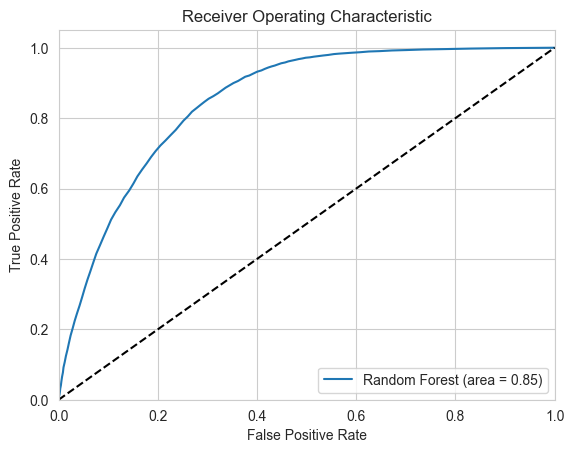

In [31]:
# RF
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_prob = rf.predict_proba(X_valid)[:, 1]
roc_value = roc_auc_score(y_valid, y_pred_prob)
print(roc_value)
# ROC
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_value)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Refer to using optuna for xgboost:https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def xb_objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 1200, 1800), 
    'max_depth': trial.suggest_int('max_depth', 2, 5),
    'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15, log=True),
    'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.1),
    'reg_alpha': trial.suggest_float('reg_alpha', 0.8, 1.0),
    'gamma': trial.suggest_float('gamma', 0.2, 0.4),
    'min_child_weight': trial.suggest_int('min_child_weight', 40, 45),
    'subsample': trial.suggest_float('subsample', 0.95, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.7),
    'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.8, 1.0),
    'colsample_bynode': trial.suggest_float('colsample_bynode', 0.8, 1.0),
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',
    'random_state': 44,
}


    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

    xb_optuna_model = XGBClassifier(**params)
    xb_optuna_model.fit(x_train, y_train)
    y_pred = xb_optuna_model.predict_proba(x_val)[:, 1]
    metric = roc_auc_score(y_val, y_pred)
    return metric

# optuna
xb_study = optuna.create_study(direction='maximize')
xb_study.optimize(
    xb_objective, 
    n_trials=50,  
    timeout=60 * 30  
)




In [32]:
best_params = xb_study.best_params
print("Best parameters:", best_params)


Best parameters: {'n_estimators': 1692, 'max_depth': 3, 'learning_rate': 0.06916675419312569, 'reg_lambda': 0.0891934888529283, 'reg_alpha': 0.8551268251235191, 'gamma': 0.3037591402288198, 'min_child_weight': 41, 'subsample': 0.9630098160276334, 'colsample_bytree': 0.502879387768758, 'colsample_bylevel': 0.9939598973577031, 'colsample_bynode': 0.967754803470803}


In [16]:
# Kfold 
# An independent model was trained in each compromise and made predictions on the test set, and then the predictions of all models were averaged as the final prediction result.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
import time
import numpy as np
import pandas as pd

kf = StratifiedKFold(n_splits=10, shuffle=True)

xgb_params = {
    'n_estimators': 1692, 
    'max_depth': 3, 
    'learning_rate': 0.06916675419312569, 
    'reg_lambda': 0.0891934888529283, 
    'reg_alpha': 0.8551268251235191, 
    'gamma': 0.3037591402288198, 
    'min_child_weight': 41, 
    'subsample': 0.9630098160276334, 
    'colsample_bytree': 0.502879387768758, 
    'colsample_bylevel': 0.9939598973577031, 
    'colsample_bynode': 0.967754803470803,
    'random_state': 43
}

def kfold_fit(xgbmodel, model_params, cv_folds, X, y, test, model_name='XGBoost'):
    fold_aucs = []
    test_predictions_list = []
    for fold, (train_idx, val_idx) in enumerate(cv_folds.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model = xgbmodel(**model_params)
        model.fit(X_train, y_train.ravel(), verbose=0)
        val_predictions = model.predict_proba(X_val)[:, 1].ravel()
        val_score = roc_auc_score(y_val, val_predictions)
        fold_aucs.append(val_score)
        print(f'{fold} ROC AUC: {val_score:.6f} ')
        # Model integration on test
        test_predictions = model.predict_proba(test)[:, 1].ravel()
        test_predictions_list.append(test_predictions)
    average_auc = sum(fold_aucs) / len(fold_aucs)
    print(f"\nAverage ROC AUC: {average_auc:.6f}")
    final_test_predictions = np.mean(test_predictions_list, axis=0)
    return average_auc,  final_test_predictions

from xgboost import XGBClassifier


average_auc,  final_test_predictions = kfold_fit(XGBClassifier, xgb_params, kf, X, y, test_data, model_name='Optimized XGBoost')


model = XGBClassifier(**xgb_params)
model.fit(X, y.ravel(), verbose=0)

train_predictions = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, train_predictions)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC on Whole Train Data: {roc_auc:.6f}")







0 ROC AUC: 0.866340 
1 ROC AUC: 0.873896 
2 ROC AUC: 0.869161 
3 ROC AUC: 0.864702 
4 ROC AUC: 0.866505 
5 ROC AUC: 0.868123 
6 ROC AUC: 0.863407 
7 ROC AUC: 0.867850 
8 ROC AUC: 0.871649 
9 ROC AUC: 0.867580 

Average ROC AUC: 0.867921
ROC AUC on Whole Train Data: 0.885177


In [17]:
Q5_output = pd.DataFrame({
    'id': test_data['id'],  
    'smoking': final_test_predictions
})
Q5_output.to_csv('Q5_output.csv', index=False)

### Here are some of my previous code attempts to optimize results that I can't guarantee will work completely. I tried different models with param & features

In [24]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def lgbm_objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
    'max_depth': trial.suggest_int('max_depth', 6, 50),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
    'num_leaves': trial.suggest_int('num_leaves', 20, 250),
    'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 1e-1, log=True),
    'subsample': trial.suggest_float('subsample', 0.4, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
    'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1.0, log=True),
    'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1.0, log=True),
}
    lgbm = LGBMClassifier(**params)
    score = cross_val_score(lgbm, X, y, cv=2, scoring='roc_auc').mean()
    return score

lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=10)
best_params = lgbm_study.best_params
print("Best parameters:", best_params)

[I 2023-12-16 10:42:25,638] A new study created in memory with name: no-name-abbb9e78-9468-477a-a1e5-52deda1ffe0c


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34827, number of negative: 44801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12009
[LightGBM] [Info] Number of data points in the train set: 79628, number of us

[I 2023-12-16 10:42:47,886] Trial 0 finished with value: 0.852423194025774 and parameters: {'n_estimators': 2831, 'max_depth': 47, 'learning_rate': 0.09029043768327515, 'num_leaves': 106, 'min_child_samples': 77, 'min_child_weight': 0.020891096120866967, 'subsample': 0.5497614179757258, 'colsample_bytree': 0.7236388621142129, 'reg_alpha': 0.017768740207712685, 'reg_lambda': 0.008724807839587519}. Best is trial 0 with value: 0.852423194025774.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34827, number of negative: 44801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12009
[LightGBM] [Info] Number of data points in the train set: 79628, number of us

[I 2023-12-16 10:43:06,304] Trial 1 finished with value: 0.8554846044711748 and parameters: {'n_estimators': 1081, 'max_depth': 47, 'learning_rate': 0.037012501104123914, 'num_leaves': 246, 'min_child_samples': 19, 'min_child_weight': 0.008377611714545811, 'subsample': 0.7972318680398087, 'colsample_bytree': 0.7276680270237581, 'reg_alpha': 0.0013034865196979236, 'reg_lambda': 0.6440882533054133}. Best is trial 1 with value: 0.8554846044711748.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2023-12-16 10:43:20,400] Trial 2 finished with value: 0.8562935778069063 and parameters: {'n_estimators': 1452, 'max_depth': 25, 'learning_rate': 0.049274586772139244, 'num_leaves': 146, 'min_child_samples': 94, 'min_child_weight': 0.038984549376622976, 'subsample': 0.7969028537877847, 'colsample_bytree': 0.46258538846636565, 'reg_alpha': 0.2332708331076133, 'reg_lambda': 0.031967372288976816}. Best is trial 2 with value: 0.8562935778069063.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2023-12-16 10:43:59,712] Trial 3 finished with value: 0.8521979807534704 and parameters: {'n_estimators': 2120, 'max_depth': 11, 'learning_rate': 0.02486230887031119, 'num_leaves': 142, 'min_child_samples': 28, 'min_child_weight': 0.0062706117454454854, 'subsample': 0.6128762873042795, 'colsample_bytree': 0.899100729273896, 'reg_alpha': 0.049297757698710046, 'reg_lambda': 0.08483142831979897}. Best is trial 2 with value: 0.8562935778069063.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2023-12-16 10:44:23,935] Trial 4 finished with value: 0.8549766138361172 and parameters: {'n_estimators': 2561, 'max_depth': 25, 'learning_rate': 0.032257314403237404, 'num_leaves': 124, 'min_child_samples': 78, 'min_child_weight': 0.0014883530454664008, 'subsample': 0.5200235603241332, 'colsample_bytree': 0.9400718799292588, 'reg_alpha': 0.11303181079367858, 'reg_lambda': 0.35764731599590444}. Best is trial 2 with value: 0.8562935778069063.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34827, number of negative: 44801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12009
[LightGBM] [Info] Number of data points in the train set: 79628, number of us

[I 2023-12-16 10:44:43,778] Trial 5 finished with value: 0.8552998505052212 and parameters: {'n_estimators': 2813, 'max_depth': 30, 'learning_rate': 0.03352208873191094, 'num_leaves': 101, 'min_child_samples': 47, 'min_child_weight': 0.003275086930184506, 'subsample': 0.8239680644228944, 'colsample_bytree': 0.5374785998849771, 'reg_alpha': 0.03807472996948494, 'reg_lambda': 0.10163403875575723}. Best is trial 2 with value: 0.8562935778069063.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34827, number of negative: 44801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12009
[LightGBM] [Info] Number of data points in the train set: 79628, number of us

[I 2023-12-16 10:44:52,809] Trial 6 finished with value: 0.8531595248146567 and parameters: {'n_estimators': 723, 'max_depth': 25, 'learning_rate': 0.05525492728183791, 'num_leaves': 158, 'min_child_samples': 29, 'min_child_weight': 0.00261876808914935, 'subsample': 0.5728122618141749, 'colsample_bytree': 0.9560131144286098, 'reg_alpha': 0.43138461586028143, 'reg_lambda': 0.003204153331460812}. Best is trial 2 with value: 0.8562935778069063.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34826, number of negative: 44802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12010
[LightGBM] [Info] Number of data points in the train set: 79628, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34827, number of negative: 44801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12009
[LightGBM] [Info] Number of data points in the train set: 79628, number of us

[W 2023-12-16 10:45:29,457] Trial 7 failed with parameters: {'n_estimators': 1967, 'max_depth': 22, 'learning_rate': 0.06458431323622496, 'num_leaves': 166, 'min_child_samples': 43, 'min_child_weight': 0.0018319744405324394, 'subsample': 0.7770540108077795, 'colsample_bytree': 0.6443192775314077, 'reg_alpha': 0.6776455382456764, 'reg_lambda': 0.0031901534254697712} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "D:\anaconda3\envs\dcai\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_25204\419575472.py", line 19, in lgbm_objective
    score = cross_val_score(lgbm, X, y, cv=2, scoring='roc_auc').mean()
  File "D:\anaconda3\envs\dcai\lib\site-packages\sklearn\model_selection\_validation.py", line 562, in cross_val_score
    cv_results = cross_validate(
  File "D:\anaconda3\envs\dcai\lib\site-packages\sklearn\utils\_param_validat

KeyboardInterrupt: 

In [26]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def catboost_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 6, 12),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-6, 100),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'thread_count': -1,
        'verbose': 0
    }

    catboost = CatBoostClassifier(**params)
    score = cross_val_score(catboost, X, y, cv=2, scoring='roc_auc').mean()
    return score

catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(catboost_objective, n_trials=5)
best_params = catboost_study.best_params
print("Best parameters:", best_params)


[I 2023-12-16 11:01:46,304] A new study created in memory with name: no-name-10af4a2f-3b5c-423b-b2a6-aa692636e121
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25204\2398241651.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25204\2398241651.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-6, 100),
[I 2023-12-16 11:02:40,664] Trial 0 finished with value: 0.8525633585103088 and parameters: {'iterations': 927, 'learning_rate': 0.0017454124377028282, 'depth': 9, 'l2_leaf_reg': 18.

Best parameters: {'iterations': 927, 'learning_rate': 0.0017454124377028282, 'depth': 9, 'l2_leaf_reg': 18.206864155820295, 'border_count': 45}


In [48]:
# Best hyperparameters for LGBM Classifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, classification_report, confusion_matrix, f1_score

from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
lgbm_params = {'n_estimators': 624, 
               'max_depth': 46, 
               'learning_rate': 0.06953273561619135, 
               'min_child_weight': 2.4187716216112944, 
               'min_child_samples': 230, 
               'subsample': 0.9515130309407626, 
               'subsample_freq': 4, 
               'colsample_bytree': 0.402284262124352, 
               'num_leaves': 71
              }

# Build the LightGBM model
LGBMModel = LGBMClassifier(**lgbm_params, random_state=42)
cross_val_score(LGBMModel, X, y, cv=4, scoring = 'roc_auc').mean()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52239, number of negative: 67203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12117
[LightGBM] [Info] Number of data points in the train set: 119442, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52240, number of negative: 67202
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12102
[LightGBM] [Info] Number of data points in the train set: 119442, number of 

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_prob = dt.predict_proba(X_valid)[:, 1]
roc_value = roc_auc_score(y_valid, y_pred_prob)
print(roc_value)

0.6573613977882411


In [22]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_prob = lgbm.predict_proba(X_valid)[:, 1]
roc_value = roc_auc_score(y_valid, y_pred_prob)
print(roc_value)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55584, number of negative: 71820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436281 -> initscore=-0.256268
[LightGBM] [Info] Start training from score -0.256268
0.8362776937455374
